In [2]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as ss

In [3]:
df_outcomes = pd.read_csv('metropolitan_outcomes.csv')
df_search = pd.read_csv('metropolitan_stop_and_search.csv')
df_street = pd.read_csv('metropolitan_street.csv')

In [4]:
boroughs_bcu = {'Westminster': 'AW - Central West', 'Kensington and Chelsea': 'AW - Central West',
                'Hammersmith and Fulham': 'AW - Central West', 'Wandsworth': 'SW - South West',
                'Lambeth': 'AS - Central South', 'Southwark': 'AS - Central South',
                'Tower Hamlets': 'CE - Central East', 'Hackney': 'CE - Central East',
                'Islington': 'CN - Central North', 'Camden': 'CN - Central North',
                'Brent': 'NW - North West', 'Ealing': 'WA - West Area', 
                'Hounslow': 'WA - West Area', 'Richmond upon Thames': 'SW - South West', 
                'Kingston upon Thames': 'SW - South West', 'Merton': 'SW - South West', 
                'Sutton': 'SN - South Area', 'Croydon': 'SN - South Area', 'Bromley': 'SN - South Area', 
                'Lewisham': 'SE - South East', 'Greenwich': 'SE - South East', 
                'Bexley': 'SE - South East', 'Havering': 'EA - East Area', 
                'Barking and Dagenham': 'EA - East Area', 'Redbridge': 'EA - East Area',
                'Newham': 'NE - North East', 'Waltham Forest': 'NE - North East', 
                'Haringey': 'NA - North Area', 'Enfield': 'NA - North Area', 'Barnet': 'NW - North West',
                'Harrow': 'NW - North West', 'Hillingdon': 'WA - West Area'}

In [5]:
street_clean = df_street.drop_duplicates().drop(columns=['Context', 'Unnamed: 0']).copy()

In [6]:
street_clean['Borough'] = street_clean['LSOA name'].str[:-5]
street_clean = street_clean[street_clean['Borough'].isin(boroughs_bcu.keys())]
street_clean['BCU'] = street_clean['Borough'].map(boroughs_bcu)

In [7]:

d = {'Anti-social behaviour': 37.83333333,
     'Bicycle theft': 2,
     'Burglary': 314,
     'Criminal damage and arson': 96.60869565,
     'Drugs' : 281.8510638,
     'Other crime' : 5.002542373,
     'Other theft' : 34.45833333,
     'Public disorder and weapons' : 182,
     'Public order' : 71.32432432,
     'Robbery' : 365,
     'Shoplifting' : 1,
     'Theft from the person' : 2,
     'Vehicle crime' : 6.833333333,
     'Violence and sexual offences' : 644.2727273,
     'Violent crime' : 1196.563636
    }
street_clean['Crime index'] = street_clean['Crime type'].map(d)
street_time = street_clean.groupby(['Borough','Month'])[['Crime index']].sum()

In [8]:
street_time['Total crimes'] = street_clean.groupby(['Borough','Month'])[['Crime index']].agg('count')
street_time['Average crime index'] =  street_time['Crime index']/street_time['Total crimes']

In [9]:
street_time

Crime index  Total crimes  Average crime index
Borough              Month                                                   
Barking and Dagenham 2019-01  4.601369e+05          1870           246.062524
                     2019-02  4.265976e+05          1848           230.842844
                     2019-03  4.718905e+05          1933           244.123382
                     2019-04  4.456694e+05          1916           232.604065
                     2019-05  4.960088e+05          2081           238.351187
...                                    ...           ...                  ...
Westminster          2021-08  9.660519e+05          5517           175.104567
                     2021-09  9.532216e+05          5677           167.909388
                     2021-10  1.112541e+06          6860           162.178008
                     2021-11  1.020505e+06          6554           155.707176
                     2021-12  1.031916e+06          6704           153.925397

[1152 rows x 3 columns]

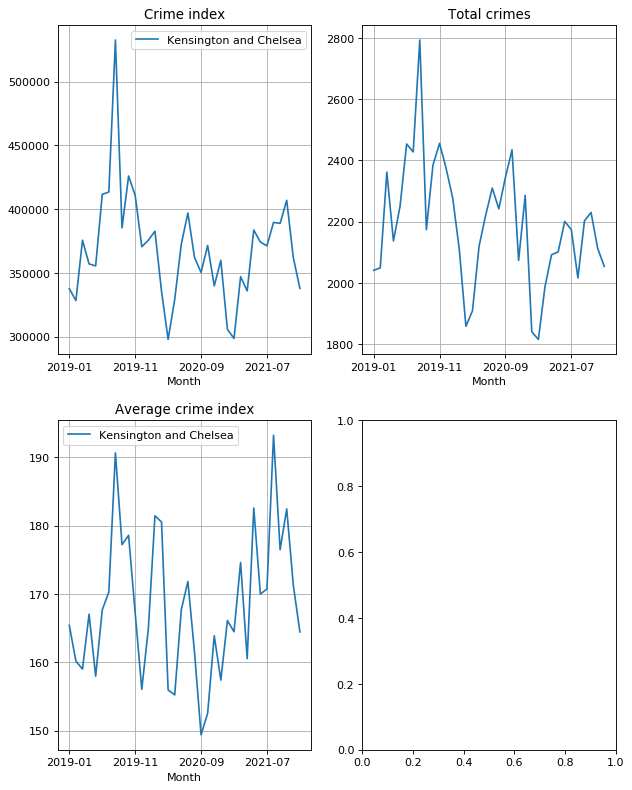

In [10]:
borough='Kensington and Chelsea'
f, a = plt.subplots(nrows=2, ncols=2, figsize=(9, 12), dpi= 80)
street_time.reset_index().pivot('Month','Borough','Crime index').plot(ax=a[0,0], title='Crime index', grid=True, y=borough)
street_time.reset_index().pivot('Month','Borough','Total crimes').plot(ax=a[0,1], title='Total crimes', grid=True,legend=False, y=borough)
street_time.reset_index().pivot('Month','Borough','Average crime index').plot(ax=a[1,0], title='Average crime index', grid=True,y=borough)
